In [1]:
from preprocess.preprocess import load_dataset, compute_label_agg, select_data, get_data_loaders

import torch
import torch.nn as nn
import torch.optim as optim

from models.CNN import MMCNN_CAT
from utils.trainer import trainer
from utils.RNN_utils import plot_losses, rename_with_acc

In [2]:
# Define device for torch
use_cuda = True
device = torch.device("cuda" if (
    use_cuda and torch.cuda.is_available()) else "cpu")
print(device)

cuda


# Define options


In [3]:
LOAD_DATASET = False
TRAIN_PATH = './PTB_train.pt'
VALID_PATH = './PTB_valid.pt'
TEST_PATH = './PTB_test.pt'
SAVE_NAME = 'MMCNN_CAT_epoch_30'
SAVE_DIR = './model_saves/'
BATCH_SIZE = 256

# Loading the dataset


In [4]:
if LOAD_DATASET:
    train_loader = torch.load(TRAIN_PATH)
    valid_loader = torch.load(VALID_PATH)
    test_loader = torch.load(TEST_PATH)
else:
    path = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
    print("Start loading")    
    data, raw_labels = load_dataset(path)
    print("done loading")    
    labels = compute_label_agg(raw_labels, path)

    data, labels, y = select_data(data, labels)

    train_loader, valid_loader, test_loader = get_data_loaders(
        data, labels, y, BATCH_SIZE)

    # torch.save(train_loader, TRAIN_PATH)
    # torch.save(valid_loader, VALID_PATH)
    # torch.save(test_loader, TEST_PATH)


Start loading
done loading


# Training the model


In [5]:
EPOCH = 30

model = MMCNN_CAT().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, train_loader, test_loader, valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/30], Step [10/67], Train Loss: 0.4853
Epoch [1/30], Train Accuracy: 0.4898
Epoch [1/30], Validation Accuracy: 0.4450, Validation Loss: 0.5339
Model saved to ==> ./model_saves/model_MMCNN_CAT_epoch_30.pt
Epoch [1/30], Step [20/67], Train Loss: 0.5134
Epoch [1/30], Train Accuracy: 0.4967
Epoch [1/30], Validation Accuracy: 0.5084, Validation Loss: 0.5052
Model saved to ==> ./model_saves/model_MMCNN_CAT_epoch_30.pt
Epoch [1/30], Step [30/67], Train Loss: 0.4591
Epoch [1/30], Train Accuracy: 0.4997
Epoch [1/30], Validation Accuracy: 0.5256, Validation Loss: 0.4858
Model saved to ==> ./model_saves/model_MMCNN_CAT_epoch_30.pt
Epoch [1/30], Step [40/67], Train Loss: 0.4716
Epoch [1/30], Train Accuracy: 0.5194
Epoch [1/30], Validation Accuracy: 0.6398, Validation Loss: 0.4689
Model saved to ==> ./model_saves/model_MMCNN_CAT_epoch_30.pt
Epoch [1/30], Step [50/67], Train Loss: 0.4787
Epoch [1/30], Train Accuracy: 0.5427
Epoch [1/30], Validation Accuracy: 0.6426, Validation Loss: 0.4

# Evaluate and plot losses


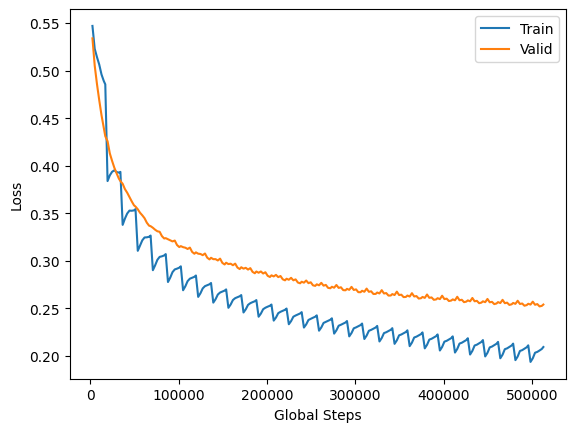

In [6]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)